In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, cohen_kappa_score

# Define features and target variable
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
        'sqft_lot15']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1042)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred.round(), weights='linear')
print("Cohen's Kappa:", kappa)


C:\users\imran\onedrive\bureaublad\ironhack\week_5\mid_bootcamp_project\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error (RMSE): 116024.63068679662
Cohen's Kappa: 0.6888514723039441


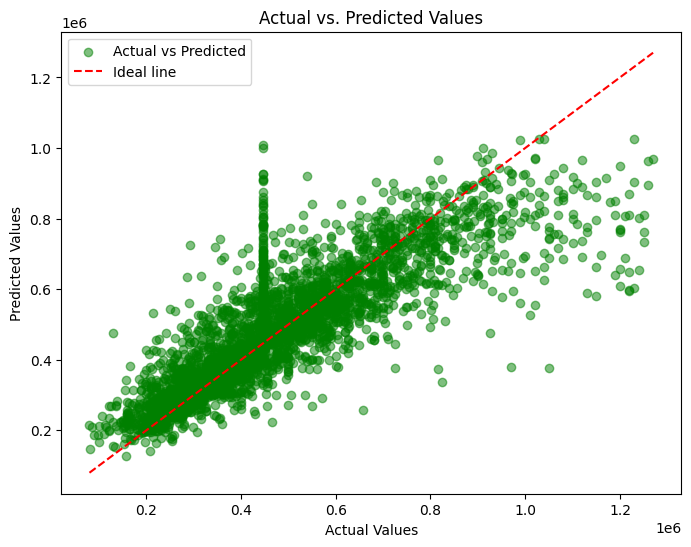

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


In [7]:
import joblib

# Save the trained model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']